<a href="https://colab.research.google.com/github/Ebonica/CODE-CRAFTERS-DATA-SCIENCE-EBONICA-SALETH/blob/main/CODE_CRAFTERS_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CODE CRAFTERS TASK1 DATA SCIENCE AND MACHINE LEARNING**

**EMPLOYEE SALARY PREDICTIONS USING SIMPLE LINEAR REGRESSION**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

**LOADING THE GIVEN DATASET**

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Salary.csv to Salary.csv


**READING THE GIVEN DATASET**

In [4]:
data=pd.read_csv("Salary.csv")

In [5]:
data

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891
5,2.9,56642
6,3.0,60150
7,3.2,54445
8,3.2,64445
9,3.7,57189


**DATA EXPLORATION**

In [6]:
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   YearsExperience  Salary
0              1.1   39343
1              1.3   46205
2              1.5   37731
3              2.0   43525
4              2.2   39891


In [8]:
print("Last few rows of the dataset:")
print(data.tail())

Last few rows of the dataset:
    YearsExperience  Salary
30             11.2  127345
31             11.5  126756
32             12.3  128765
33             12.9  135675
34             13.5  139465


In [7]:
print("Dataset Information:")
print(data.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes
None


In [9]:
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
       YearsExperience         Salary
count        35.000000      35.000000
mean          6.308571   83945.600000
std           3.618610   32162.673003
min           1.100000   37731.000000
25%           3.450000   57019.000000
50%           5.300000   81363.000000
75%           9.250000  113223.500000
max          13.500000  139465.000000


In [10]:
print("\nMissing Values:")
print(data.isnull().sum())


Missing Values:
YearsExperience    0
Salary             0
dtype: int64


In [11]:
print("\nColumns:")
print(data.columns)


Columns:
Index(['YearsExperience', 'Salary'], dtype='object')


In [12]:
print("\nShape:")
print(data.shape)


Shape:
(35, 2)


In [13]:
print("\nDATA TYPES:")
print(data.dtypes)


DATA TYPES:
YearsExperience    float64
Salary               int64
dtype: object


In [14]:
print("\n Access the 21th row (index 20)")
data.iloc[20]


 Access the 21th row (index 20)


YearsExperience        6.8
Salary             91738.0
Name: 20, dtype: float64

In [15]:
unique_counts = data.nunique()
print("Number of unique values in each column:")
print(unique_counts)

Number of unique values in each column:
YearsExperience    33
Salary             35
dtype: int64


In [16]:
nunique_counts = data.nunique()


for column in data.columns:
    unique_values = data[column].unique()
    value_counts = data[column].value_counts()

    print(f"Column: {column}")
    print(f"Number of unique values: {nunique_counts[column]}")
    print(f"Unique values: {unique_values}")
    print(f"Value counts:\n{value_counts}\n")

Column: YearsExperience
Number of unique values: 33
Unique values: [ 1.1  1.3  1.5  2.   2.2  2.9  3.   3.2  3.7  3.9  4.   4.1  4.5  4.9
  5.1  5.3  5.9  6.   6.8  7.1  7.9  8.2  8.7  9.   9.5  9.6 10.3 10.5
 11.2 11.5 12.3 12.9 13.5]
Value counts:
3.2     2
4.0     2
1.1     1
9.6     1
7.9     1
8.2     1
8.7     1
9.0     1
9.5     1
10.3    1
6.8     1
10.5    1
11.2    1
11.5    1
12.3    1
12.9    1
7.1     1
5.9     1
6.0     1
1.3     1
5.3     1
5.1     1
4.9     1
4.5     1
4.1     1
3.9     1
3.7     1
3.0     1
2.9     1
2.2     1
2.0     1
1.5     1
13.5    1
Name: YearsExperience, dtype: int64

Column: Salary
Number of unique values: 35
Unique values: [ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872
 127345 126756 128765 135675 139465]
Value counts:
39343     1
116969    1
91738     1
98273     1
101302    1
1

**LINEAR REGRESSION MODEL**

In [19]:
X = data[['YearsExperience']]
y = data['Salary']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

**EVALUATING THE PERFORMANCE**

In [22]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 55761791.306260146
R-squared (R2) Score: 0.8914234140042779


In [23]:
print("Predicted Values:")
print(y_pred)

Predicted Values:
[110576.91706292  64251.57268882 103713.90308157  89987.87511888
  71114.58667017 119155.68453961  80551.23089452]


In [27]:
results_df = pd.DataFrame({'Actual Salary (y_test)': y_test, 'Predicted Salary (y_pred)': y_pred})

print(results_df)

    Actual Salary (y_test)  Predicted Salary (y_pred)
26                  116969              110576.917063
13                   57081               64251.572689
24                  109431              103713.903082
21                   98273               89987.875119
15                   67938               71114.586670
29                  121872              119155.684540
19                   93940               80551.230895


**DATA VISUALIZATION**

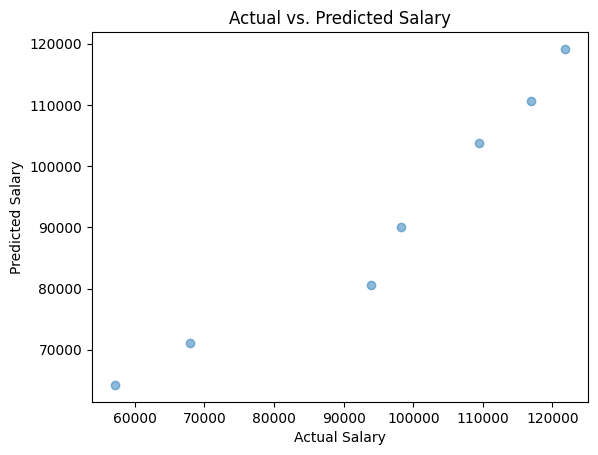

In [26]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary")
plt.show()

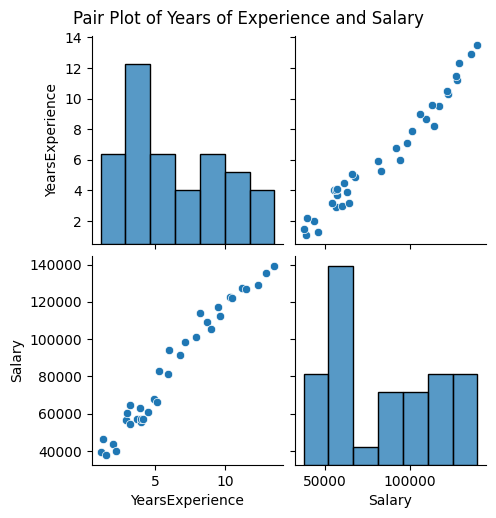

In [28]:
pair_plot_data = pd.concat([X, y], axis=1)
sns.pairplot(pair_plot_data)
plt.suptitle('Pair Plot of Years of Experience and Salary', y=1.02)
plt.show()

Text(0, 0.5, 'Frequency')

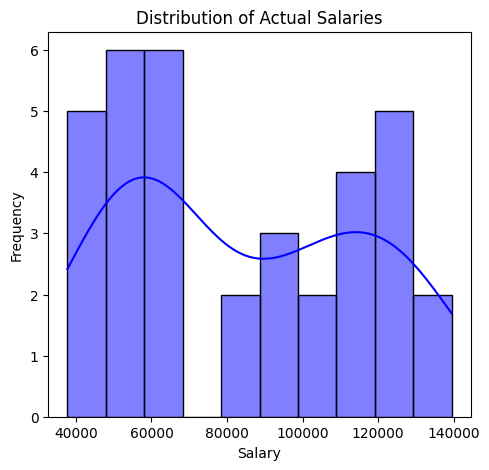

In [29]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(y, bins=10, kde=True, color='blue')
plt.title('Distribution of Actual Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')

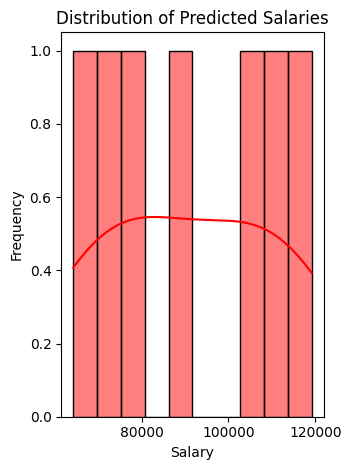

In [30]:
plt.subplot(1, 2, 2)
sns.histplot(y_pred, bins=10, kde=True, color='red')
plt.title('Distribution of Predicted Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()